In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Load CSV

In [23]:
# Load the CSV file into a DataFrame
df_kalyanbrata = pd.read_csv('kalyanbrata_data.csv')

data = df_kalyanbrata
print(data.head())

   Trial Number  Test Number  Set Size  \
0             1            1        15   
1             1            2        15   
2             1            3        15   
3             1            4        15   
4             1            5        15   

                                     Words Displayed Test Word  Is Target  \
0  ['eager', 'broad', 'value', 'board', 'score', ...     since      False   
1  ['eager', 'broad', 'value', 'board', 'score', ...     prize      False   
2  ['eager', 'broad', 'value', 'board', 'score', ...     fifty      False   
3  ['eager', 'broad', 'value', 'board', 'score', ...     wrote       True   
4  ['eager', 'broad', 'value', 'board', 'score', ...     candy       True   

  Participant Response  Correct     Timestamp  Response Time  
0                   No     True  1.730977e+09       1.756223  
1                   No     True  1.730977e+09       1.203253  
2                   No     True  1.730977e+09       0.792583  
3                  Yes     True 

Function to calculate H, M, FA and CR

In [24]:
# Function to calculate hit rate, false alarm rate, miss rate, and correct rejection rate
def calculate_rates(data, set_size):
    subset = data[data['Set Size'] == set_size]
    hits = len(subset[(subset['Is Target'] == True) & (subset['Participant Response'] == 'Yes')])
    misses = len(subset[(subset['Is Target'] == True) & (subset['Participant Response'] == 'No')])
    false_alarms = len(subset[(subset['Is Target'] == False) & (subset['Participant Response'] == 'Yes')])
    correct_rejections = len(subset[(subset['Is Target'] == False) & (subset['Participant Response'] == 'No')])

    total_targets = hits + misses
    total_lures = false_alarms + correct_rejections

    # Avoid division by zero by adding a small constant
    epsilon = 1e-6
    hit_rate = hits / (total_targets + epsilon)
    false_alarm_rate = false_alarms / (total_lures + epsilon)
    miss_rate = misses / (total_targets + epsilon)
    correct_rejection_rate = correct_rejections / (total_lures + epsilon)

    return hit_rate, miss_rate, false_alarm_rate, correct_rejection_rate

More Functions

In [25]:
# Function to calculate d' and c
def calculate_d_prime_c(hit_rate, false_alarm_rate):
    # Convert hit rate and false alarm rate to z-scores
    hit_rate = np.clip(hit_rate, 1e-5, 1 - 1e-5)
    false_alarm_rate = np.clip(false_alarm_rate, 1e-5, 1 - 1e-5)
    z_hit = norm.ppf(hit_rate)
    z_fa = norm.ppf(false_alarm_rate)

    # d' and c calculations
    d_prime = z_hit - z_fa
    c = -0.5 * (z_hit + z_fa)

    return d_prime, c

# Function to calculate ROC curve data
def calculate_roc_curve(hit_rates, false_alarm_rates):
    plt.figure(figsize=(8, 6))
    plt.plot(false_alarm_rates, hit_rates, marker='o', linestyle='None', color='b', label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance Level')
    plt.xlabel('False Alarm Rate')
    plt.ylabel('Hit Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

Main analysis

In [26]:
# Main Analysis
set_sizes = data['Set Size'].unique()
results = []

all_hit_rates = []
all_false_alarm_rates = []

for set_size in set_sizes:
    hit_rate, miss_rate, false_alarm_rate, correct_rejection_rate = calculate_rates(data, set_size)
    d_prime, c = calculate_d_prime_c(hit_rate, false_alarm_rate)

    results.append({
        'Set Size': set_size,
        "Hit Rate": hit_rate,
        "Miss Rate": miss_rate,
        "False Alarm Rate": false_alarm_rate,
        "Correct Rejection Rate": correct_rejection_rate,
        "d'": d_prime,
        "c": c
    })

    all_hit_rates.append(hit_rate)
    all_false_alarm_rates.append(false_alarm_rate)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   Set Size  Hit Rate  Miss Rate  False Alarm Rate  Correct Rejection Rate  \
0        15  0.933333   0.066667          0.133333                0.866667   
1        20  1.000000   0.000000          0.400000                0.600000   
2        25  0.733333   0.266667          0.400000                0.600000   
3        30  0.866667   0.133333          0.133333                0.866667   
4         5  1.000000   0.000000          0.000000                1.000000   
5        35  0.800000   0.200000          0.333333                0.666667   
6        10  0.933333   0.066667          0.133333                0.866667   

         d'             c  
0  2.611857 -1.951569e-01  
1  4.518238 -2.005772e+00  
2  0.876273 -1.847892e-01  
3  2.221543  1.548417e-07  
4  8.529782 -5.080381e-13  
5  1.272348 -2.054468e-01  
6  2.611857 -1.951569e-01  


Making data frame

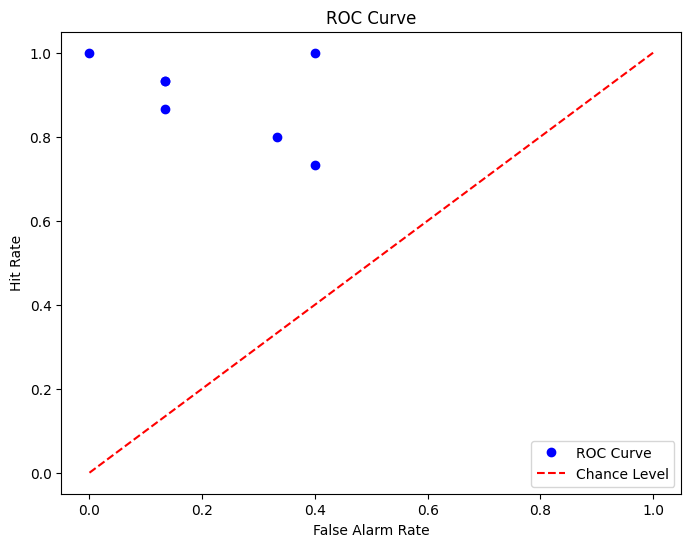

In [27]:
# Plot ROC Curve
calculate_roc_curve(all_hit_rates, all_false_alarm_rates)

# Save to CSV
results_df.to_csv('analysis_results.csv', index=False)

Plot

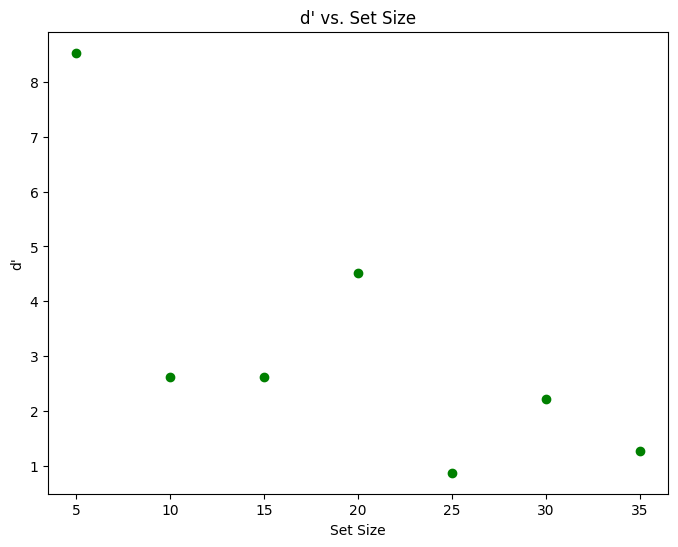

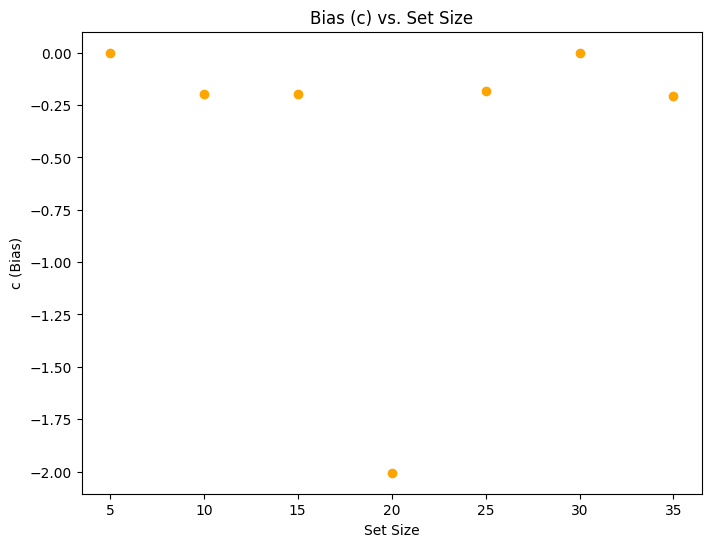

In [28]:
# Show d' vs. set size plot
plt.figure(figsize=(8, 6))
plt.plot(results_df['Set Size'], results_df["d'"], marker='o', linestyle='None', color='g')
plt.xlabel('Set Size')
plt.ylabel("d'")
plt.title("d' vs. Set Size")
plt.show()

# Show bias (c) vs. set size plot
plt.figure(figsize=(8, 6))
plt.plot(results_df['Set Size'], results_df['c'], marker='o', linestyle='None', color='orange')
plt.xlabel('Set Size')
plt.ylabel('c (Bias)')
plt.title('Bias (c) vs. Set Size')
plt.show()
